## Insights

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Phase II data_parser1(): Zillow aggregated
zillow_agg = pd.read_csv("Home_values.csv")

# Added to Phase II data_parser2()
# zillow['Year'] = [int(zillow['Date'][i][:4]) for i in range(len(zillow['Date']))]
# zillow = zillow[zillow['Year'] > 2010]
# zillow.drop(columns='Year', inplace=True)

# Phase II data_parser2(): Zillow full
zillow = pd.read_csv("Home_values_depth.csv", usecols=[i for i in range(1, 9)]) # exclude old index

# Phase II web_parser1(): BEA
bea = pd.read_csv("General_GDP_Region.csv", usecols=[1, 2, 3]) # exclude old index
bea['GDP (thousands)'] = [s.replace(",", "") for s in bea['GDP (thousands)']]
bea.replace('(NA)', '0', inplace=True)
bea = bea.astype({'GDP (thousands)': 'int64'})
bea = bea[bea['GDP (thousands)'] != 0]

# Phase II web_parser2(): BLS
bls = pd.read_csv("Employment_Other_stats.csv")
bls.set_index('months_ago', drop=True)
bls.rename(columns={col: str.lstrip(col) for col in bls.columns}, inplace=True)

# Phase II extra_source1(): BLS GDP
industry_gdp = pd.read_csv("GDP_in_depth.csv")

In [3]:
def insight1():
    top_zip = zillow.groupby(['ZIP', 'City', 'State', 'Metro']).agg("mean").round(1)
    top_zip = top_zip.sort_values('ZHVI', ascending=False)[:10]
    top_zip.reset_index(level=[0, 1, 2, 3], inplace=True)
    top_zip.drop(columns=['Size Rank'], inplace=True)

    print(top_zip)
    print()

    top_zip2 = zillow.groupby(['ZIP', 'State', 'Metro']).agg("mean").round(1)
    top_zip2 = top_zip2.sort_values('ZHVI', ascending=False)[:50]
    top_zip2.reset_index(level=[0, 1, 2], inplace=True)
    top_metro = top_zip2.groupby(['Metro']).agg({'ZIP': "count", 'ZHVI': "mean"})
    top_st = top_zip2.groupby(['State']).agg({'ZIP': "count", 'ZHVI': "mean"})

    print(top_metro)
    print()
    print(top_st)
    print()

    bea2 = bea[(bea['Year'] == 2018) | (bea['Year'] == 2019)]
    bea2.drop(columns=['Year'], inplace=True)
    bea2 = bea2.groupby(['County']).agg("mean").round(2)
    bea2.sort_values('GDP (thousands)', inplace=True, ascending=False)

    print(bea2)
    print()

    atl_zip = zillow[zillow['Metro'] == 'Atlanta-Sandy Springs-Roswell']
    atl_zip = zillow[zillow['State'] == 'GA']
    atl_zip = atl_zip.groupby(['ZIP', 'City']).agg("mean").round(1)
    atl_zip = atl_zip.sort_values('ZHVI', ascending=False)
    atl_zip.reset_index(level=[0, 1], inplace=True)

    print(atl_zip)


############ Function Call ############
insight1()

     ZIP            City State                           Metro       ZHVI
0  94027        Atherton    CA   San Francisco-Oakland-Hayward  4811896.3
1  90210   Beverly Hills    CA  Los Angeles-Long Beach-Anaheim  3550936.4
2  11962      Sagaponack    NY     New York-Newark-Jersey City  3356082.6
3   2199          Boston    MA         Boston-Cambridge-Newton  3135935.5
4  93108       Montecito    CA       Santa Maria-Santa Barbara  2796696.5
5  90402    Santa Monica    CA  Los Angeles-Long Beach-Anaheim  2721598.0
6  10118        New York    NY     New York-Newark-Jersey City  2688480.4
7  94028  Portola Valley    CA   San Francisco-Oakland-Hayward  2650649.1
8  92661   Newport Beach    CA  Los Angeles-Long Beach-Anaheim  2645896.8
9  94301       Palo Alto    CA  San Jose-Sunnyvale-Santa Clara  2645471.5

                                       ZIP          ZHVI
Metro                                                   
Boston-Cambridge-Newton                  1  3.135936e+06
Brunswick     

C:\Users\zchar\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


       ZIP             City  Size Rank       ZHVI
0    31561       Sea Island      23419  2319612.7
1    30327          Atlanta       4773   917951.9
2    30342    Sandy Springs       2502   499690.1
3    30306          Atlanta       3579   497590.8
4    31411  Skidaway Island       9584   472471.3
..     ...              ...        ...        ...
696  31903         Columbus       5914    37690.9
697  31045           Jewell      33045    35255.2
698  31206            Macon       4523    33368.0
699  31722         Moultrie      27956    33026.8
700  31747         Ellenton      30068    22095.5

[701 rows x 4 columns]


### Insight 1 Explanation

Insight 1 is descriptive analysis of ZIP codes with the highest home values. First displayed is the 10 ZIP Codes with the highest home value, averaged over all months. Then it show the average ZHVI and count of the top 50 ZIP codes nationally by which metro and state they are in. Third is the richest counties by GDP. Lastly, the Atlanta metro ZIPs in Georgia are sorted by ZHVI.

In [4]:
def insight2():
    # print(bls.corr())
    unemploy_corr = bls.corr()['Unemployment Rate (Adjusted)']
    unemploy_corr = unemploy_corr[(abs(unemploy_corr) > 0.4) & (abs(unemploy_corr) != 1)]
    print(unemploy_corr)

############ Function Call ############
insight2()

months_ago                                                      0.499932
Civilian Labor Force (Adjusted)                                -0.722559
Civilian Employment (Adjusted)                                 -0.934155
Civilian Unemployment (Adjusted)                                0.999104
Total Nonfarm Employment (Adjusted)                            -0.894389
CPI for All Urban Consumers (CPI-U) 1982-84=100 (Unadjusted)   -0.462220
PPI Final Demand (Adjusted)                                    -0.468950
PPI Final Demand (Unadjusted)                                  -0.464658
PPI Final Demand less foods and energy (Unadjusted)            -0.478494
PPI Finished Goods 1982=100 (Unadjusted)                       -0.424829
Imports                                                         0.503027
Employment Cost Index (ECI) Civilian (Unadjusted)               0.605754
ECI Private (Unadjusted)                                        0.553276
Name: Unemployment Rate (Adjusted), dtype: float64


### Insight 2 Explanation

Insight 2 is deceptively complex. The code seems simple because the bls data is already processed and merged in Phase II. The first printed output however shows the relationships between many fields. A negative correlation with months_ago means the field increased over time and larger magnitudes mean this increased more consistently/linearly.

The second printed output is the correlation to unemployment rate for fields that have high magnitude correlation to it. This insight was used to decide what fields to use in visual2().

In [5]:
def insight3():
  bea3 = bea.groupby(['Year']).agg("sum")
  bea3.reset_index(inplace=True)
  year = np.array(bea3['Year'], dtype='int64')
  gdp = np.array(bea3['GDP (thousands)'], dtype='int64')
  model = sm.OLS(year, sm.add_constant(gdp)).fit()
  print(model.summary())

############ Function Call ############
insight3()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     915.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.18e-16
Time:                        20:12:47   Log-Likelihood:                -21.231
No. Observations:                  19   AIC:                             46.46
Df Residuals:                      17   BIC:                             48.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1983.0742      0.908   2184.010      0.0

C:\Users\zchar\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Insight 3 Explanation

Insight 3 is the results of simple linear regression on total US GDP over time. The trend is fairly linear as suggested by r^squared near 1 and low standard error for the intercept, const, and slope, x1. 

In [6]:
def insight4():
  zillow2 = zillow_agg.T
  zillow2.rename(columns=zillow2.iloc[0], inplace=True)
  zillow2.drop(zillow2.index[0], inplace=True)
  zillow2 = zillow2.astype(int)

  x = zillow2.index.values
  x = x.astype(int)
  n = x.size
  sum_x = x.sum()
  mean_x = sum_x / n
  
  r_sq = dict()
  for st in zillow2.columns:
    y = zillow2[st]
    y = y.astype(int)
    sum_y = y.sum()
    mean_y = sum_y / n
    Sxy  = np.array((x - mean_x) * (y - mean_y)).sum()
    Sxx = np.array((x - mean_x) ** 2).sum()
    slope = Sxy / Sxx
    intercept = mean_y - slope * mean_x
    # print('Estimation for ZHVI of %s is %s + %s * year' % (st, intercept.round(6), slope.round(6)))

    rss = np.array((y - (intercept + slope * x)) ** 2).sum()
    sst = np.array((y - mean_y) ** 2).sum()
    r_sq[st] = 1 - rss / sst

  r_sqs = np.array([r_sq[s] for s in r_sq])
  mean_r_sq = r_sqs.mean()
  var_r_sq = r_sqs.var()
  print(f'Mean of each state\'s r squared of ZHVI vs. year: %s' % mean_r_sq)
  print(f'Variance of each state\'s r squared of ZHVI vs. year: %s' % var_r_sq)


############ Function Call ############
insight4()

Mean of each state's r squared of ZHVI vs. year: 0.3908391210953122
Variance of each state's r squared of ZHVI vs. year: 9.234412823046364e-05


### Insight 4 Explanation

The trends of each state's yearly average of each ZIP's monthly ZHVI is fairly nonlinear as suggested by the 0.39 average r^squared. The low variance shows that each state's r^squared is very close to the average of r^squared. The trend over time for each state is thus pretty similar in linearity.

In [12]:
zillow_county = pd.DataFrame(zillow, columns=['State', 'County', 'Date', 'ZHVI'])
zillow_county['CountyStateYear'] = [s[:-7]  + ", " for s in zillow_county['County']] + zillow_county['State'] + [" " + s[:4] for s in zillow_county['Date']]
zillow_county.drop(columns=['County', 'State'], inplace=True)
zillow_county = zillow_county.groupby('CountyStateYear').agg('mean')
zillow_county.rename(columns={'ZHVI': 'Average Monthly ZHVI'}, inplace=True)

bea1 = bea
bea1['CountyStateYear'] = bea['County'] + [" " + str(i) for i in bea['Year']]
bea1.set_index('CountyStateYear', drop=True)

county = pd.merge(bea1, zillow_county, how='inner', on=['CountyStateYear'])
county.drop(columns=['CountyStateYear'], inplace=True)
county.astype({'Year': int, 'GDP (thousands)': int, 'Average Monthly ZHVI': float, 'County': str})
county.set_index(['County', 'Year'], drop=True)

# Simple Regression - stats
zhvi = np.array(list(map(int, county['Average Monthly ZHVI'].round(0))), dtype='int64')
gdp = np.array(county['GDP (thousands)'], dtype='int64')
model = sm.OLS(gdp, sm.add_constant(zhvi)).fit()
 
county['Estimated ZHVI'] = model.predict((1, zhvi))[0]
county['ZHVI Residual'] = county['Average Monthly ZHVI']

def insight5():
  print(model.summary())
  print()

  # print(county)
  print()

  # Simple Regression - numpy, scipy
  x = gdp
  y = zhvi
  n = x.size
  sum_x = x.sum()
  sum_y = y.sum()
  mean_x = sum_x / n
  mean_y = sum_y / n
  Sxy  = np.array((x - mean_x) * (y - mean_y)).sum()
  Sxx = np.array((x - mean_x) ** 2).sum()
  slope = Sxy / Sxx
  intercept = mean_y - slope * mean_x
  print('Estimation for ZHVI is %s + %s * GDP + random noise' % (intercept.round(6), slope.round(6)))

  alpha = 0.025
  rss = np.array((y - (intercept + slope * x)) ** 2).sum()
  sigma_squared_hat = rss / (n - 2)
  t_val = t.ppf(1 - alpha / 2, n - 2)
  radius = t_val * (sigma_squared_hat / Sxx) ** 0.5
  low = slope - radius
  up = slope + radius
  print(f'99%% Confidence Interval for slope (ZHVI vs. GDP in thousands): %s <= beta1 <= %s' % (low.round(6), up.round(6)))

  min = x.min()
  y_hat_min = intercept + slope * min
  max = x.max()
  y_hat_max = intercept + slope * max
  diff_min = y.min() - y_hat_min
  diff_max = y.max() - y_hat_max
  print(f'Difference between estimated ZHVI at min GDP and min ZHVI: %s' % diff_min)
  print(f'Difference between estimated ZHVI at max GDP and max ZHVI: %s' % diff_max)

  sst = np.array((y - mean_y) ** 2).sum()
  r_squared = 1 - rss / sst
  print(f'R^2: %s' % r_squared)


############ Function Call ############
insight5()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     9485.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:52:23   Log-Likelihood:            -7.8453e+05
No. Observations:               42732   AIC:                         1.569e+06
Df Residuals:                   42730   BIC:                         1.569e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.861e+06   1.82e+05    -43.160      0.0

C:\Users\zchar\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


### Insight 5 Explanation

Insight 5 is evaluating the hypothesis that the average monthly ZHVI (home value) in a county positively linearly correlated with the yearly GDP. The R-sqaured of 0.170 shows that the relationship is poorly modelled by a linear relationship. For the manual calculations with NumPy and SciPy, the x and y were switched to create a different estimation. Another low-math measure of regression performance, the difference between the estimated y at the min and max x compared to the actual min and max y, showed that the maximums were close ($629 home value off) and the minimums were far. Potentially this correlation only works for counties with higher GDP and higher home values. However, the data provides 99% confidence that $1 GDP correlates to between $1.794 to $1.912 home value, which is a small but present positive corrlation.

The merge between the datasets appears simple in final form but went through many iterations of debugging.

## Data Visualizations

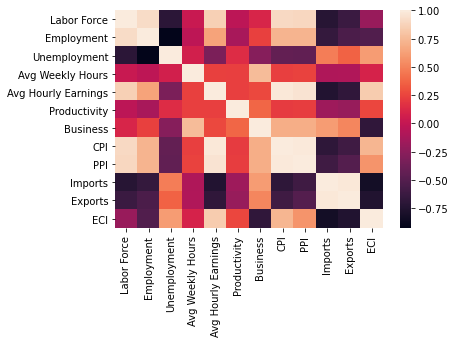

In [8]:
bls_select = pd.DataFrame(bls, columns=['Civilian Labor Force (Adjusted)', 'Civilian Employment (Adjusted)', 'Civilian Unemployment (Adjusted)',
'Total Private Average Weekly Hours of All Employees (Adjusted)', 'Total Private Average Hourly Earnings of All Employees (Adjusted)',
'Non-farm Business Productivity', 'Private Nonfarm Business', 'CPI for All Urban Consumers (CPI-U) 1982-84=100 (Unadjusted)',
'PPI Final Demand (Adjusted)', 'Imports', 'Exports', 'Employment Cost Index (ECI) Civilian (Unadjusted)'])
bls_select.rename(columns={'Civilian Labor Force (Adjusted)': 'Labor Force', 'Civilian Employment (Adjusted)': 'Employment', 'Civilian Unemployment (Adjusted)': 'Unemployment',
'Total Private Average Weekly Hours of All Employees (Adjusted)': 'Avg Weekly Hours', 'Total Private Average Hourly Earnings of All Employees (Adjusted)': 'Avg Hourly Earnings',
'Non-farm Business Productivity': 'Productivity', 'Private Nonfarm Business': 'Business', 'CPI for All Urban Consumers (CPI-U) 1982-84=100 (Unadjusted)': 'CPI',
'PPI Final Demand (Adjusted)': 'PPI', 'Employment Cost Index (ECI) Civilian (Unadjusted)': 'ECI'}, inplace=True)

def visual1():
  sns.heatmap(bls_select.corr())
  plt.show()


############ Function Call ############
visual1()

### Visualization 1 Explanation

Visual 1 is a heatmap of important BLS fields. A heatmap shows the correlation coefficients between two fields. Labor force, employment, and unemployment sizes have slightly different correlations. The down echelon (correlation of fields with themselves) is the main light colored area which visualizes the fact that few fields are strongly positively correlated.


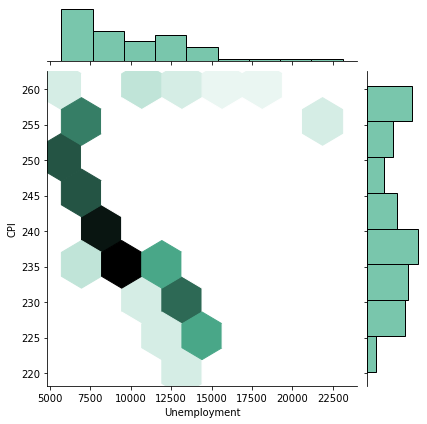

In [9]:
def visual2():
  sns.jointplot(x=bls_select['Unemployment'], y=bls_select['CPI'], kind="hex", color="#4CB391")


############ Function Call ############
visual2()

### Visualization 2 Explanation

The center of the plot shows the prevalence of hex range of (CPI, Unemployment) values. The outer histograms show the prevalance of values for one field. The CPI has a less consistent trend and the collection of dark colors slanting down suggests a negative relationship between CPI and unemployment. CPI is consumer price index.

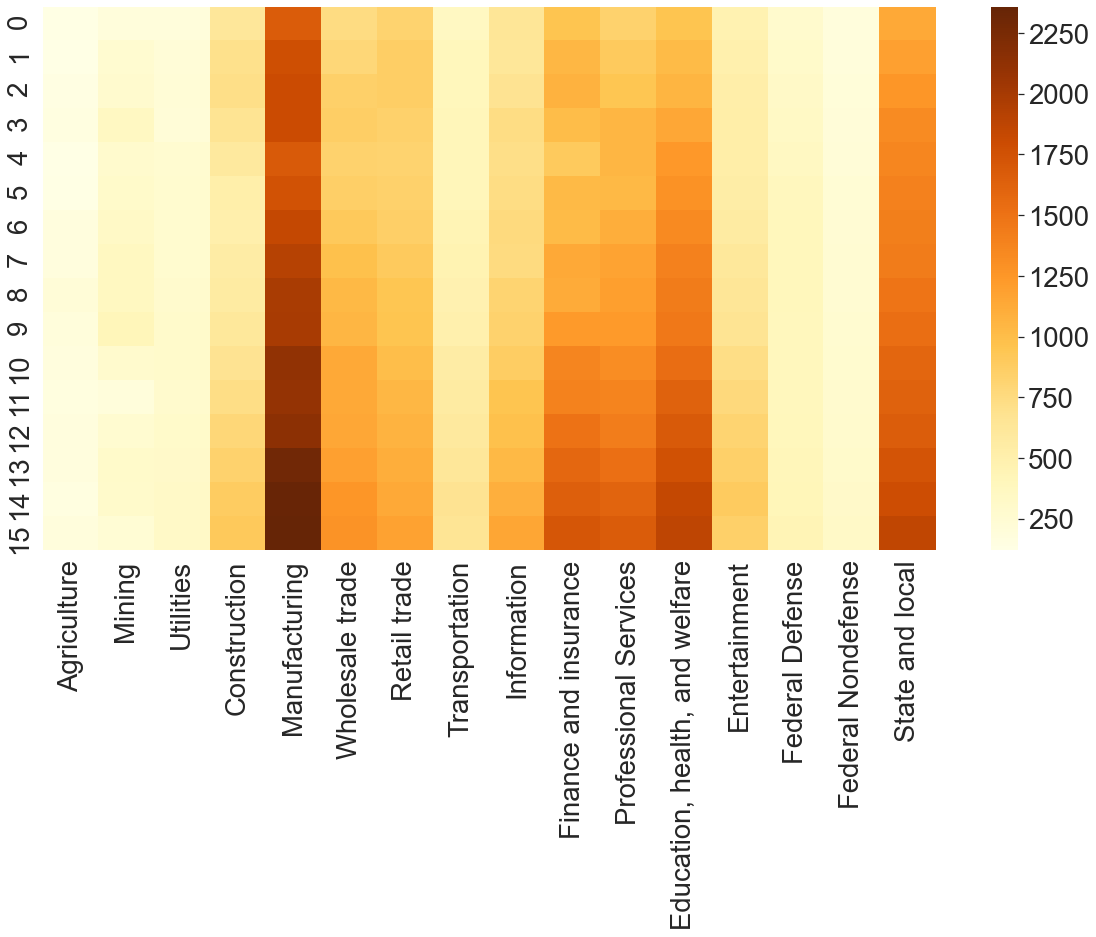

In [10]:
def visual3():
    industry_gdp_2 = pd.DataFrame(industry_gdp, columns=['Agriculture, forestry, fishing, and hunting', 'Mining',
       'Utilities', 'Construction','Manufacturing', 'Wholesale trade', 'Retail trade', 
       'Transportation and warehousing', 'Information', 'Finance and insurance', 'Professional, scientific, and technical services', 
       'Educational services, health care, and social assistance', 'Arts, entertainment, recreation, accommodation, and food services',
       'National defense', 'Nondefense', 'State and local'])
    industry_gdp_2.rename(columns={'Agriculture, forestry, fishing, and hunting': 'Agriculture','Transportation and warehousing': 'Transportation',
        'Professional, scientific, and technical services': 'Professional Services', 'National defense': 'Federal Defense',
       'Educational services, health care, and social assistance': 'Education, health, and welfare', 'Nondefense': 'Federal Nondefense',
       'Arts, entertainment, recreation, accommodation, and food services': 'Entertainment'}, inplace=True)

    sns.set(rc = {'figure.figsize':(20, 10)})
    sns.set(font_scale = 2.5)
    GDP_heatmap = sns.heatmap(industry_gdp_2, cmap='YlOrBr')
    fig_GDP = GDP_heatmap.get_figure()
    fig_GDP.savefig('GDPheatmap.png')
    pd.set_option('display.max_rows', 90)


############ Function Call ############
visual3()

### Visualization 3 Explanation

Visual 3 is a time series heatmap. Going down the chart, colors get darker meaning the fields increased over time. Recall that time 0 represents the earliest data, 15 years ago, currently 2004 and 15 represents the most recent year, currently 2020. The visual allows us to quickly see what sectors or sector categories produce the most GDP. The drop in manufacturing GDP after 2008 can also be seen.

Much of state and local GDP comes from federal funds given to state and local governments who then spend the money. Spending on private sector goods and services is the GDP creation event.

## Summary File

In [11]:
def summary1():
  county.to_csv('County.csv') #see instantiation in cell for insight5()

  print(county)

############ Function Call ############
summary1()

            County  Year  GDP (thousands)  Average Monthly ZHVI  \
0      Autauga, AL  2001           748918         158025.055556   
1      Autauga, AL  2002           781937         159522.805556   
2      Autauga, AL  2003           804299         164254.750000   
3      Autauga, AL  2004           946964         172771.964286   
4      Autauga, AL  2005           969849         182659.107143   
...            ...   ...              ...                   ...   
42727   Weston, WY  2015           299245         164547.291667   
42728   Weston, WY  2016           254092         171370.354167   
42729   Weston, WY  2017           273154         175844.375000   
42730   Weston, WY  2018           318654         186213.270833   
42731   Weston, WY  2019           319777         199755.020833   

       Estimated ZHVI  ZHVI Residual  
0        7.577669e+06  158025.055556  
1        7.724016e+06  159522.805556  
2        8.186306e+06  164254.750000  
3        9.018371e+06  172771.964286  
